In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from wordcloud.wordcloud import WordCloud #wordcloud
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder #labelecoding
encoder = LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer #stemming in nltk
ps = PorterStemmer()
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SpamDetection/spam.csv', encoding='latin-1')

In [4]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.sample(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1582,ham,"Yep, at derek's house now, see you Sunday &lt;3",NaN,NaN,NaN
3767,ham,Where are you call me.,NaN,NaN,NaN
1111,ham,"Awesome, think we can get an 8th at usf some t...",NaN,NaN,NaN


In [8]:
df.drop(['Unnamed: 2'],axis= 1,inplace = True)
df.drop(['Unnamed: 3'],axis= 1,inplace = True)
df.drop(['Unnamed: 4'],axis= 1,inplace = True)

In [9]:
df.rename(columns = {'v1':'target'}, inplace = True)
df.rename(columns = {'v2':'text'}, inplace = True)
df.rename(columns={'message ':'text'},inplace=True)
df.sample(5)

,target,text
4155,ham,"Yo, call me when you get the chance, a friend ..."
139,ham,Got c... I lazy to type... I forgot Ì_ in lect...
3234,ham,"Yes, princess. Toledo."
5475,ham,Dhoni have luck to win some big title.so we wi...
735,ham,Then why no one talking to me


In [10]:
df.rename(columns={'Message':'text'},inplace=True)
df.rename(columns={'Category':'target'},inplace=True)
df.loc[df['target'] == 'spam', 'target',] = 0
df.loc[df['target'] == 'ham', 'target',] = 1
df.sample(5)

,target,text
1968,1,2 laptop... I noe infra but too slow lar... I ...
4520,1,Hi good mornin.. Thanku wish u d same..
4805,1,Call me when u finish then i come n pick u.
4661,1,Ladies first and genus second k .
3912,1,Yeah whatever lol


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep='first')

In [ ]:
df['target'].value_counts()

1    4516
0     653
Name: target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

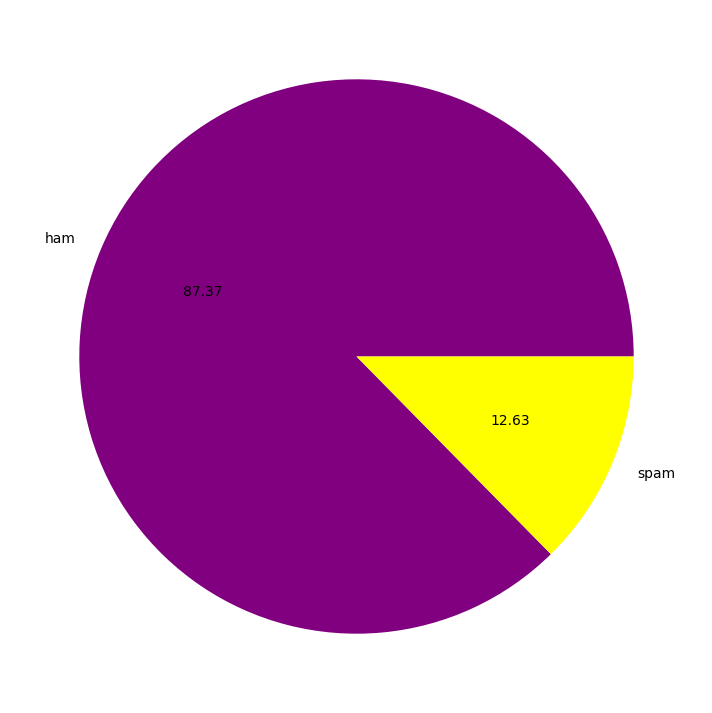

In [14]:
plt.figure(figsize=(15,9))
plt.pie (df['target'].value_counts(), colors= ['purple', 'yellow'], labels=['ham','spam'],autopct="%.2f")
plt.show

In [15]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
df.head(5)


,target,text,char_count
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
df['char_count']=df['text'].apply(len)

In [18]:
df.head(5)

,target,text,char_count
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
df['word_count']= df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [19]:
df.head(5)

,target,text,char_count
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
df['sent_count']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [22]:
df.head(5)

,target,text,char_count,word_count,sent_count
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df[['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
df[df['target']==1][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['target']==0][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [26]:
def transform_text(text):
  #lower case
  text = text.lower()
  #tokenization
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  #punctuation and stopwords removal
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation :
      y.append(i)
  #stemming
  text = y[:]
  y.clear()
  for i in text :
    y.append(ps.stem(i))

  return " ".join(y)

In [27]:
transform_text('my name is Abhradip Mandal')

'name abhradip mandal'

In [28]:
df['transformed_text']=df['text'].apply(transform_text)

In [29]:
df.head()

,target,text,char_count,word_count,sent_count,transformed_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


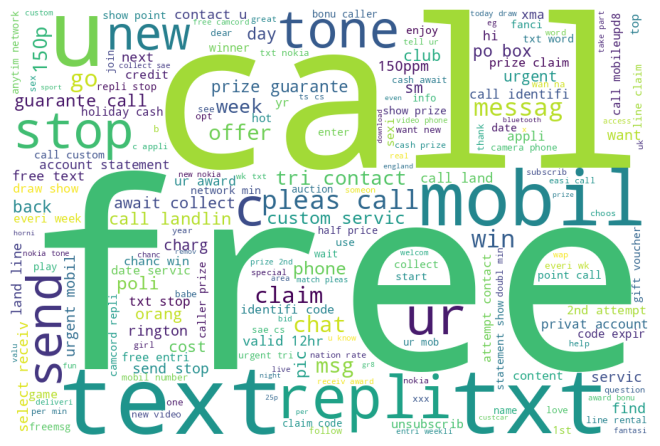

In [30]:
from wordcloud import WordCloud
wc = WordCloud(width=900,height=600,min_font_size=10,background_color='white').generate(" ".join(df[df['target']==0]['transformed_text'].astype(str)))
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

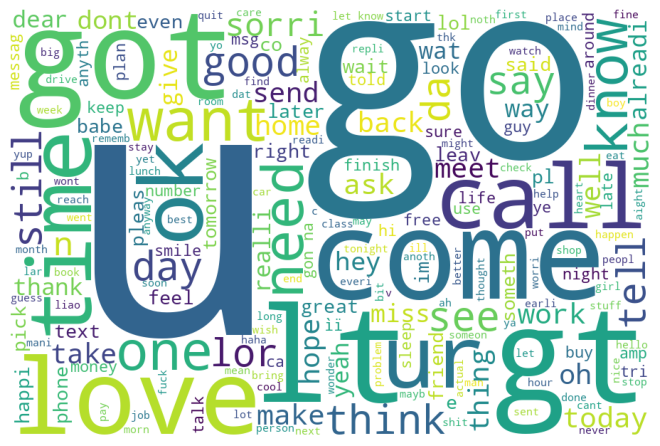

In [31]:
wc1 = WordCloud(width=900,height=600,min_font_size=10,background_color='white').generate(" ".join(df[df['target']==1]['transformed_text'].astype(str)))
plt.imshow(wc1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [32]:
df.head(10)

,target,text,char_count,word_count,sent_count,transformed_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,0,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,1,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,1,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,0,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,0,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [33]:
spam_corpus= [] #empty list
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [34]:
len(spam_corpus)

9939

In [35]:
(Counter(spam_corpus).most_common(10))

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

In [36]:
ham_corpus= [] #empty list
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [37]:
len(ham_corpus)

35404

In [38]:
(Counter(ham_corpus).most_common(10))

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234)]

# ***Algorithms***

In [39]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [40]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [41]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)
X.shape

(5169, 3000)

In [43]:
y = df['target'].values

In [44]:
y=y.astype('int')
y

array([1, 1, 0, ..., 1, 1, 1])

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=2)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [48]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lg = LogisticRegression()
svc= SVC()

In [49]:
#gaussian naive bayes
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy score: ",accuracy_score(y_test,y_pred1))
print("precision score: ",precision_score(y_test,y_pred1))

accuracy score:  0.8755641521598968
precision score:  0.9771054783319706


In [50]:
#multinomial naive bayes
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy score: ",accuracy_score(y_test,y_pred2))
print("precision score: ",precision_score(y_test,y_pred2))

accuracy score:  0.9800128949065119
precision score:  0.9832727272727273


In [51]:
#bernoulli naive bayes
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy score: ",accuracy_score(y_test,y_pred3))
print("precision score: ",precision_score(y_test,y_pred3))

accuracy score:  0.9819471308833011
precision score:  0.9812138728323699


In [52]:
#Logistic regression
lg.fit(X_train,y_train)
y_pred4 = lg.predict(X_test)
print("accuracy score: ",accuracy_score(y_test,y_pred4))
print("precision score: ",precision_score(y_test,y_pred4))

accuracy score:  0.9729206963249516
precision score:  0.9713876967095851


In [53]:
#support machine vector
svc.fit(X_train,y_train)
y_pred8 = svc.predict(X_test)
print("accuracy score: ",accuracy_score(y_test,y_pred8))
print("precision score: ",precision_score(y_test,y_pred8))

accuracy score:  0.9780786589297228
precision score:  0.9762931034482759
